<a href="https://colab.research.google.com/github/xxtanghuruxx/2022390627_-/blob/main/4%EC%A1%B0_%EC%84%A0%ED%98%95%EC%98%88%EC%B8%A1%EB%AA%A8%EB%8D%B8%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


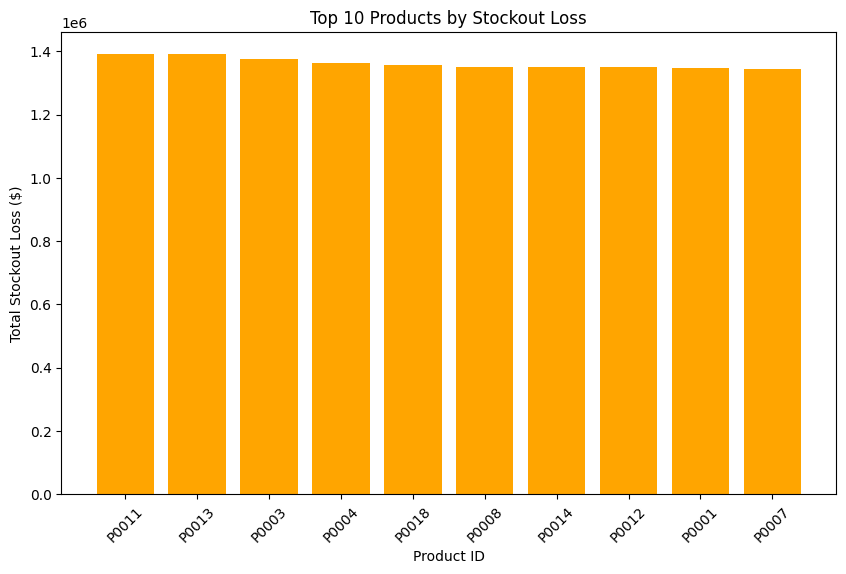

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("/content/drive/MyDrive/retail_store_inventory.csv")

# 파생변수 생성: 매출 손실 계산
df['Stockout_Loss'] = (df['Demand Forecast'] - df['Units Sold']) * df['Price']
df['Stockout_Loss'] = df['Stockout_Loss'].apply(lambda x: x if x > 0 else 0)

# 제품별 총 매출 손실 계산
stockout_summary = df.groupby('Product ID')['Stockout_Loss'].sum().reset_index()
top_stockout = stockout_summary.sort_values(by='Stockout_Loss', ascending=False).head(10)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(top_stockout['Product ID'], top_stockout['Stockout_Loss'], color='orange')
plt.xlabel('Product ID')
plt.ylabel('Total Stockout Loss ($)')
plt.title('Top 10 Products by Stockout Loss')
plt.xticks(rotation=45)
plt.show()


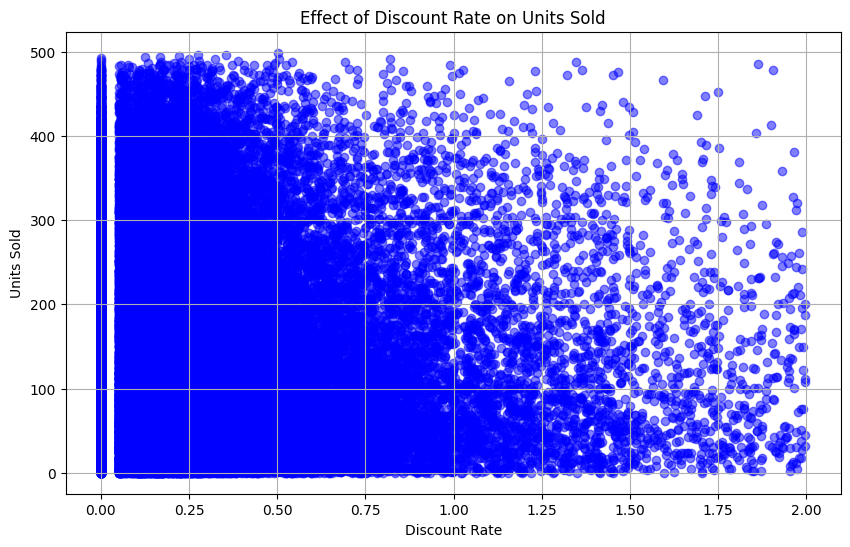

Discount Rate와 Units Sold의 상관관계:
                Discount Rate  Units Sold
Discount Rate       1.000000   -0.000917
Units Sold         -0.000917    1.000000


In [ ]:
# 할인율 파생변수 생성
df['Discount Rate'] = df['Discount'] / df['Price']

# 할인율과 판매량의 관계 분석
plt.figure(figsize=(10, 6))
plt.scatter(df['Discount Rate'], df['Units Sold'], alpha=0.5, color='blue')
plt.xlabel('Discount Rate')
plt.ylabel('Units Sold')
plt.title('Effect of Discount Rate on Units Sold')
plt.grid()
plt.show()

# 상관관계 확인
correlation = df[['Discount Rate', 'Units Sold']].corr()
print("Discount Rate와 Units Sold의 상관관계:\n", correlation)


In [ ]:
pip install scikit-learn pandas matplotlib


Mean Absolute Error (MAE): 88.99
R² Score: -0.00


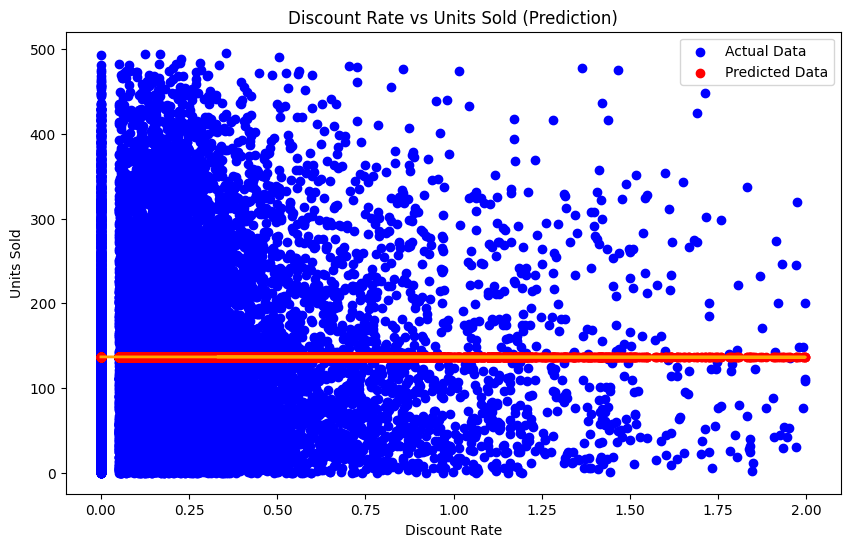

할인율 15.0% 적용 시 예상 판매량: 137 단위


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 데이터 로드
df = pd.read_csv("/content/drive/MyDrive/retail_store_inventory.csv")

# 데이터 전처리: 필요한 컬럼만 사용
df['Discount Rate'] = df['Discount'] / df['Price']  # 할인율 계산
data = df[['Discount Rate', 'Units Sold']].dropna()  # 결측치 제거

# 독립 변수(X)와 종속 변수(y) 설정
X = data[['Discount Rate']]  # 할인율 (독립 변수)
y = data['Units Sold']       # 판매량 (종속 변수)

# 데이터 분할: 학습 데이터와 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습: 선형 회귀 모델
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 결과 시각화: 실제 값 vs 예측 값
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.plot(X_test, y_pred, color='orange', linewidth=2)
plt.xlabel('Discount Rate')
plt.ylabel('Units Sold')
plt.title('Discount Rate vs Units Sold (Prediction)')
plt.legend()
plt.show()

# 할인율 입력 시 예상 판매량 예측
new_discount = [[0.15]]  # 예: 15% 할인
predicted_units = model.predict(new_discount)
print(f"할인율 {new_discount[0][0]*100}% 적용 시 예상 판매량: {predicted_units[0]:.0f} 단위")


Mean Absolute Error (MAE): 88.99
R² Score: -0.00


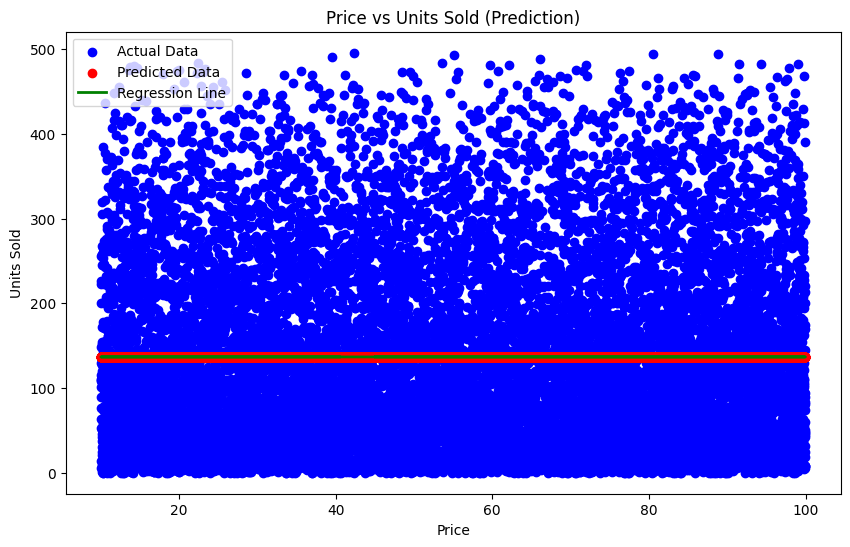

제품 가격 10 달러일 때 예상 판매량: 137 단위


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 데이터 로드
df = pd.read_csv("/content/drive/MyDrive/retail_store_inventory.csv")

# 독립 변수(X)와 종속 변수(y) 설정
X = df[['Price']]  # 제품 가격
y = df['Units Sold']  # 판매량

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.title('Price vs Units Sold (Prediction)')
plt.legend()
plt.show()

# 특정 가격 예측
new_price = [[10]]  # 예: 10달러
predicted_units = model.predict(new_price)
print(f"제품 가격 {new_price[0][0]} 달러일 때 예상 판매량: {predicted_units[0]:.0f} 단위")


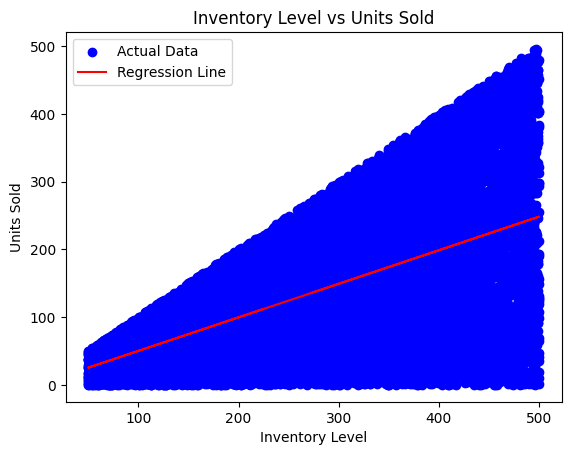

재고 수준이 50일 때 예상 판매량: 25 단위


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# 독립 변수(X)와 종속 변수(y) 설정
X = df[['Inventory Level']]  # 재고 수준
y = df['Units Sold']  # 판매량

# 데이터 분할 및 모델 학습
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 시각화
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Inventory Level')
plt.ylabel('Units Sold')
plt.title('Inventory Level vs Units Sold')
plt.legend()
plt.show()

# 특정 재고 수준 예측
new_inventory = [[50]]  # 예: 재고 수준 50
predicted_units = model.predict(new_inventory)
print(f"재고 수준이 {new_inventory[0][0]}일 때 예상 판매량: {predicted_units[0]:.0f} 단위")


Mean Absolute Error (MAE): 68.90
R² Score: 0.35


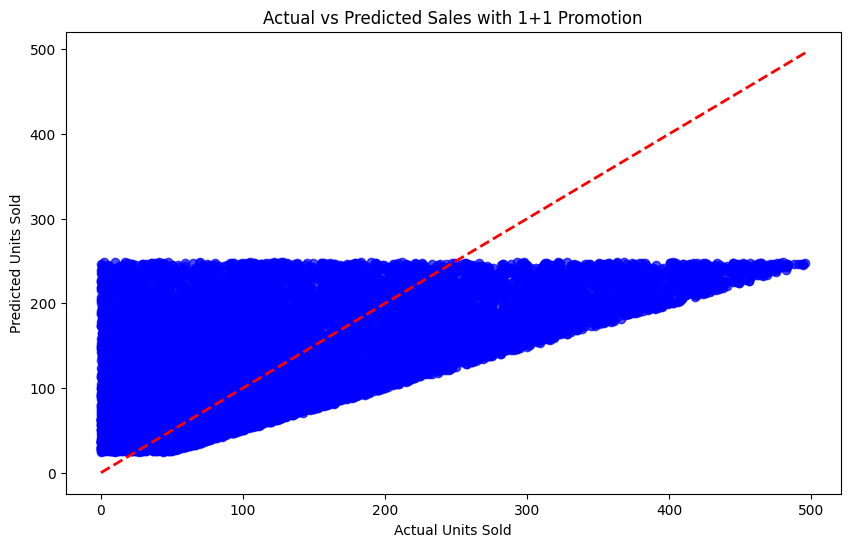

1+1 프로모션 적용 시 예상 판매량: 26 단위


In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/retail_store_inventory.csv")

# 데이터 전처리
# 1+1 프로모션 여부를 이진 변수로 설정 (예: 프로모션이면 1, 아니면 0)
df['Promotion_1+1'] = np.where(df['Discount'] > 0, 1, 0)  # 예시 조건: 할인된 제품을 1+1로 설정

# 독립 변수(X)와 종속 변수(y) 설정
X = df[['Promotion_1+1', 'Price', 'Inventory Level']]  # 독립 변수: 1+1 여부, 가격, 재고 수준
y = df['Units Sold']  # 종속 변수: 판매량

# 데이터 분할: 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습: 다중 선형 회귀
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 시각화: 실제 판매량 vs 예측 판매량
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted Sales with 1+1 Promotion")
plt.show()

# 새로운 조건 예측
new_data = pd.DataFrame({
    'Promotion_1+1': [1],  # 1+1 프로모션 적용
    'Price': [10],         # 제품 가격 예: 10달러
    'Inventory Level': [50]  # 재고 수준 예: 50
})
predicted_units = model.predict(new_data)
print(f"1+1 프로모션 적용 시 예상 판매량: {predicted_units[0]:.0f} 단위")


Mean Absolute Error (MAE): 70.16
R² Score: 0.31


<ipython-input-15-bbf3111b2bf7>:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, color="red")


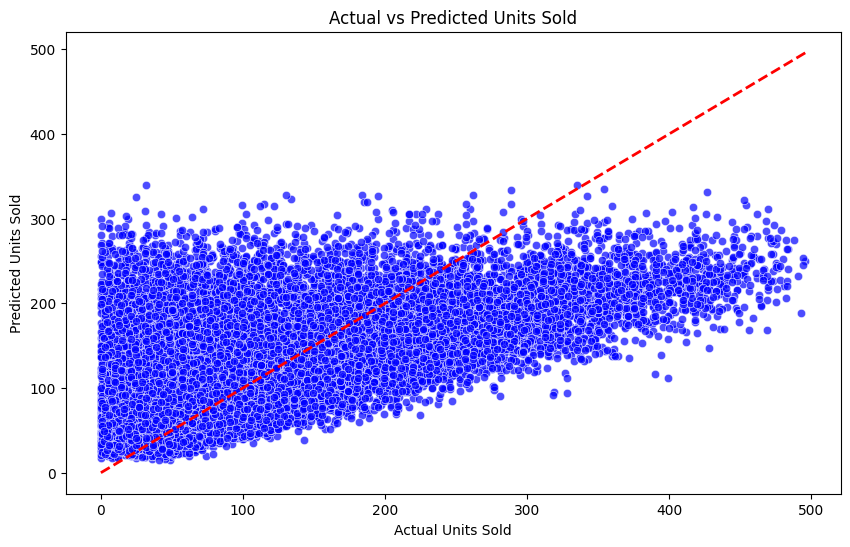

1+1 프로모션 적용 시 예상 판매량: 27 단위


In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/retail_store_inventory.csv")

# 데이터 전처리
# 결측치 확인 및 처리
df = df.dropna(subset=['Units Sold', 'Price', 'Inventory Level', 'Discount'])  # 주요 변수 결측치 제거

# 파생변수 생성
df['Discount Rate'] = df['Discount'] / df['Price']  # 할인율 계산
df['Promotion_1+1'] = np.where(df['Discount'] > 0, 1, 0)  # 1+1 프로모션 여부를 이진 변수로 설정
df['Price Difference'] = df['Price'] - df['Competitor Pricing']  # 경쟁사 가격 차이

# 날짜 변수 처리
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.dayofweek  # 요일 변수 추가 (0: 월요일, 6: 일요일)
df['Month'] = df['Date'].dt.month  # 월 변수 추가

# 사용할 변수 설정
features = ['Promotion_1+1', 'Price', 'Inventory Level', 'Discount Rate',
            'Price Difference', 'DayOfWeek', 'Month']
target = 'Units Sold'

# 독립 변수(X)와 종속 변수(y) 설정
X = df[features]
y = df[target]

# 데이터 스케일링 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할: 학습 데이터와 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 머신러닝 모델 학습: Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 실제값 vs 예측값 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, color="red")
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted Units Sold")
plt.show()

# 새로운 조건 입력 시 예측
new_data = pd.DataFrame({
    'Promotion_1+1': [1],   # 1+1 프로모션 적용
    'Price': [10],          # 제품 가격 (예시)
    'Inventory Level': [50], # 재고 수준 (예시)
    'Discount Rate': [0.1],  # 할인율 10%
    'Price Difference': [-2],  # 경쟁사 가격이 2원 낮음
    'DayOfWeek': [5],       # 토요일
    'Month': [12]           # 12월
})

# 입력값 스케일링
new_data_scaled = scaler.transform(new_data)
predicted_units = model.predict(new_data_scaled)
print(f"1+1 프로모션 적용 시 예상 판매량: {predicted_units[0]:.0f} 단위")


Mean Absolute Error (MAE): 70.09
R² Score: 0.31


<ipython-input-16-8b27de4149b2>:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, color="red")


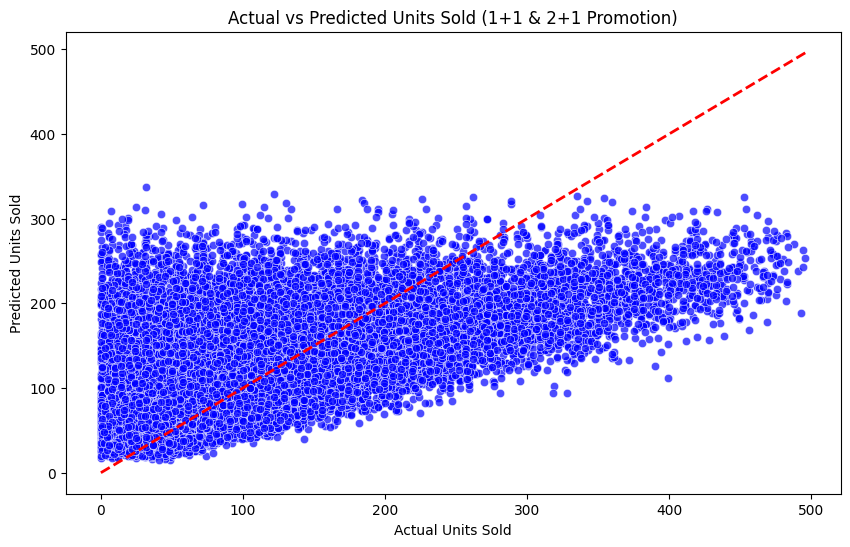

2+1 프로모션 적용 시 예상 판매량: 26 단위


In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/retail_store_inventory.csv")

# 데이터 전처리
# 결측치 처리
df = df.dropna(subset=['Units Sold', 'Price', 'Inventory Level', 'Discount'])  # 주요 변수 결측치 제거

# 프로모션 변수 생성
df['Discount Rate'] = df['Discount'] / df['Price']  # 할인율 계산
df['Promotion_1+1'] = np.where((df['Discount'] > 0) & (df['Units Sold'] / df['Units Ordered'] == 2), 1, 0)  # 1+1 여부
df['Promotion_2+1'] = np.where((df['Discount'] > 0) & (df['Units Sold'] / df['Units Ordered'] == 3), 1, 0)  # 2+1 여부

# 파생변수 생성
df['Price Difference'] = df['Price'] - df['Competitor Pricing']  # 경쟁사 가격 차이
df['Date'] = pd.to_datetime(df['Date'])  # 날짜 형식 변환
df['DayOfWeek'] = df['Date'].dt.dayofweek  # 요일 변수 추가
df['Month'] = df['Date'].dt.month  # 월 변수 추가

# 사용할 변수 설정
features = ['Promotion_1+1', 'Promotion_2+1', 'Price', 'Inventory Level',
            'Discount Rate', 'Price Difference', 'DayOfWeek', 'Month']
target = 'Units Sold'

# 독립 변수(X)와 종속 변수(y) 설정
X = df[features]
y = df[target]

# 데이터 스케일링 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할: 학습 데이터와 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 머신러닝 모델 학습: Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 실제값 vs 예측값 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, color="red")
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted Units Sold (1+1 & 2+1 Promotion)")
plt.show()

# 새로운 조건 입력 시 예측
new_data = pd.DataFrame({
    'Promotion_1+1': [0],    # 1+1 미적용
    'Promotion_2+1': [1],    # 2+1 프로모션 적용
    'Price': [10],           # 제품 가격
    'Inventory Level': [50], # 재고 수준
    'Discount Rate': [0.15], # 할인율
    'Price Difference': [-2],# 경쟁사 가격 차이
    'DayOfWeek': [5],        # 토요일
    'Month': [12]            # 12월
})

# 입력값 스케일링 및 예측
new_data_scaled = scaler.transform(new_data)
predicted_units = model.predict(new_data_scaled)
print(f"2+1 프로모션 적용 시 예상 판매량: {predicted_units[0]:.0f} 단위")
